In [1]:
import pandas as pd
import seaborn as sb
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [11]:
df=pd.read_csv('database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [4]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [12]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [13]:
df['Date']=pd.to_datetime(df['Date'],utc=True)

In [14]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [15]:
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,year,month,day
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,131.6,6.0,1965,1,2
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,80.0,5.8,1965,1,4
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,20.0,6.2,1965,1,5
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,15.0,5.8,1965,1,8
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,15.0,5.8,1965,1,9


In [16]:
df.drop(columns=['Date','Time','month','day'],axis=1,inplace=True)

In [17]:
df.head()

,Latitude,Longitude,Depth,Magnitude,year
0,19.246,145.616,131.6,6.0,1965
1,1.863,127.352,80.0,5.8,1965
2,-20.579,-173.972,20.0,6.2,1965
3,-59.076,-23.557,15.0,5.8,1965
4,11.938,126.427,15.0,5.8,1965


In [18]:
df1=df

In [19]:
col_to_scale=['Magnitude','year']
scaler=StandardScaler()
df1[col_to_scale]=scaler.fit_transform(df1[col_to_scale])

In [20]:
df1.head()

,Latitude,Longitude,Depth,Magnitude,year
0,19.246,145.616,131.6,0.277668,-1.915487
1,1.863,127.352,80.0,-0.195082,-1.915487
2,-20.579,-173.972,20.0,0.750418,-1.915487
3,-59.076,-23.557,15.0,-0.195082,-1.915487
4,11.938,126.427,15.0,-0.195082,-1.915487


In [21]:
X1=df.drop(columns=['Depth','Magnitude'],axis=1)
y1=df[['Depth','Magnitude']]

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=432)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(18729, 3) (4683, 3) (18729, 2) (4683, 2)


In [22]:
col_to_scale=['Latitude','Longitude','Magnitude','year']
scaler=StandardScaler()
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In [23]:
df.head()

,Latitude,Longitude,Depth,Magnitude,year
0,0.583377,0.844368,131.6,0.277668,-1.915487
1,0.006109,0.698849,80.0,-0.195082,-1.915487
2,-0.739162,-1.701962,20.0,0.750418,-1.915487
3,-2.017599,-0.503524,15.0,-0.195082,-1.915487
4,0.340688,0.691479,15.0,-0.195082,-1.915487


In [24]:
X=df.drop(columns=['Depth','Magnitude'],axis=1)
y=df[['Depth','Magnitude']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=432)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18729, 3) (4683, 3) (18729, 2) (4683, 2)


In [23]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)
neurons = [16]
batch_size = [10]
epochs = [10]
activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']
param_grid = dict(neurons=neurons, batch_size=batch_size, 
                  epochs=epochs, activation=activation, 
                  optimizer=optimizer, loss=loss)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_8632\4273654375.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [18]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X1_train, y1_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.995942 using {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.995942 (0.001005) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.661256 (0.283673) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.995942 (0.001005) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.497813 (0.332858) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}


In [115]:
del model

In [153]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(3,)))
model.add(Dense(2, activation='relu', ))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='SGD', loss='MSE', metrics=['accuracy'])

In [158]:
s=time.time()
model.fit(X1_train, y1_train, batch_size=50, epochs=10, verbose=1, validation_data=(X1_test, y1_test))
e=time.time()

Epoch 1/10
375/375 [==============================] - 1s 1ms/step - loss: 9988.4404 - accuracy: 0.9958 - val_loss: 9824.8047 - val_accuracy: 0.9966
Epoch 2/10
375/375 [==============================] - 0s 1ms/step - loss: 9988.4385 - accuracy: 0.9958 - val_loss: 9824.8047 - val_accuracy: 0.9966
Epoch 3/10
375/375 [==============================] - 0s 1ms/step - loss: 9988.4375 - accuracy: 0.9958 - val_loss: 9824.8047 - val_accuracy: 0.9966
Epoch 4/10
375/375 [==============================] - 0s 1ms/step - loss: 9988.4424 - accuracy: 0.9958 - val_loss: 9824.8047 - val_accuracy: 0.9966
Epoch 5/10
375/375 [==============================] - 0s 1ms/step - loss: 9988.4365 - accuracy: 0.9958 - val_loss: 9824.8047 - val_accuracy: 0.9966
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 9988.4385 - accuracy: 0.9958 - val_loss: 9824.8047 - val_accuracy: 0.9966
Epoch 7/10
375/375 [==============================] - 0s 1ms/step - loss: 9988.4395 - accuracy: 0.9958 - val_los

In [159]:
e-s

5.369445562362671

In [119]:
s=time.time()
[test_loss, test_acc] = model.evaluate(X1_test, y1_test)
e=time.time()
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

147/147 [==============================] - 0s 931us/step - loss: 9824.8008 - accuracy: 0.9966
Evaluation result on Test Data : Loss = 9824.80078125, accuracy = 0.9965834021568298


In [120]:
e-s

0.22017240524291992

In [40]:
X1_test.shape

(4683, 3)

In [92]:
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
import time

In [96]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
start_time=time.time()
model.fit(X1_train,y1_train['Depth'])
end_time=time.time()

In [95]:
end_time-start_time

4.216991662979126

In [97]:
start_time=time.time()
model.score(X1_test,y1_test['Depth'])
end_time=time.time()

In [98]:
end_time-start_time

0.1190195083618164

In [46]:
model_sgd=SGDRegressor()
model_sgd.fit(X1_train,y1_train['Depth'])

SGDRegressor()

In [47]:
model_sgd.score(X1_test,y1_test['Depth'])

-1.0962171391073122e+21

In [48]:
import lightgbm as lgb

In [142]:
start_time=time.time()
model_lightGb=lgb.LGBMRegressor(learning_rate=0.09,max_bin=100)
model_lightGb.fit(X1_train,y1_train['Depth'])
end_time=time.time()

In [143]:
end_time-start_time

0.09950041770935059

In [108]:
s=time.time()
model_lightGb.score(X1_test,y1_test['Depth'])
e=time.time()

In [109]:
e-s

0.011326074600219727

In [52]:
y1_test.head()

,Depth,Magnitude
19782,10.0,-0.904207
12789,33.0,-0.904207
5731,33.0,-0.195082
6042,580.3,-0.667832
20159,14.0,1.932293


In [57]:
from xgboost import XGBRegressor

In [150]:
start_time=time.time()
my_model = XGBRegressor(n_estimators=400,learning_rate=0.05)
my_model.fit(X1_train,y1_train['Depth'])
end_time=time.time()

In [151]:
end_time-start_time

3.5772759914398193

In [152]:

my_model.score(X1_test,y1_test['Depth'])

0.8400298211211864

In [102]:
end_time-start_time

0.03748583793640137

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
s=time.time()
regr_1 = DecisionTreeRegressor()
regr_1.fit(X1_train,y1_train['Depth'])
e=time.time()

In [137]:
e-s

0.08374524116516113

In [112]:
s=time.time()
regr_1.score(X1_test,y1_test['Depth'])
e=time.time()

In [113]:
e-s

0.004121303558349609

In [63]:
from sklearn import linear_model

In [66]:
reg_lassolar = linear_model.BayesianRidge()
reg_lassolar.fit(X1_train,y1_train['Depth'])

BayesianRidge()

In [67]:
reg_lassolar.score(X1_test,y1_test['Depth'])

0.013533893883543202

In [68]:
from sklearn.linear_model import TweedieRegressor

In [69]:
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit(X1_train,y1_train['Depth'])

ValueError: Some value(s) of y are out of the valid range for family TweedieDistribution

In [70]:
from sklearn import svm

In [87]:
regr=svm.SVR(kernel='rbf')
regr.fit(X1_train,y1_train['Magnitude'])

SVR()

In [89]:
regr.score(X1_train,y1_train['Magnitude'])

-0.09153130146991595

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
y1_test_depth=y1_test['Depth']

In [121]:
df3=pd.read_csv('metric.csv')

In [122]:
df3

,Model,Accuracy,Training time,Testing time
0,ANN,96,10.96,0.22
1,RandomForestRegressor,88,4.21,0.11
2,LGBMRegressor,78,0.10,0.01
3,XGBRegressor,85,8.79,0.03
4,DecisionTreeRegressor,79,0.08,0.05


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 20 artists>)

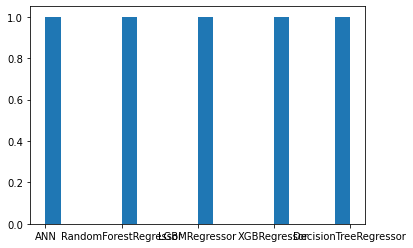

In [125]:
plt.hist(df3.Model,bins=20)